In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [3]:
size_x = 100
size_y = 100
# Rules for cell survival:
num_survive_min = 2
num_survive_max = 3

# Minimum number of cells for new cell to be born:
num_born = 3

In [4]:
# generating a random set of values lying between 0 and 1
playground = np.random.randint(0,2,[size_x,size_y])

# setting the outer boundary to 0s
playground[:,0]=0
playground[:,size_x-1]=0
playground[0,:]=0
playground[size_y-1,:]=0

In [5]:
print(playground)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


Now, let us see how this matrix looks, using matplotlib:

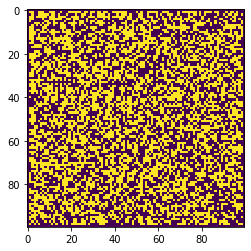

In [6]:
plt.imshow(playground)
plt.show()

As we may want it to be in a different color scale, lets actually do that using the `set_cmap()` function of NumPy.

In [7]:
plt.set_cmap("Greys")

<Figure size 432x288 with 0 Axes>

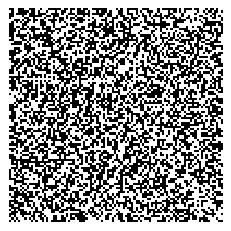

In [8]:
#plt.figure(figsize=(20,20))
plt.imshow(playground)
plt.axis("off")
plt.show()

Beautiful Barcode, huh?

In [9]:
def calc_neighbours(grid):
    weight = np.array([[1,1,1],[1,0,1],[1,1,1]])
    return convolve2d(grid, weight, 'same')

def update_grid(grid):
    # copying the actual grid to temp grid so that as we cycle through every point we can make the changes to the temp grid
    # and still retain the grid for the previous time step in grid. After the locations of the next time step is formed,
    # it is updated to grid. Directly equating two matrices lead to sharing the same object and hence to avoid this we use np.copy()
    
    size_x = len(grid)
    size_y = len(grid[0])
    temp_grid = np.copy(grid)
    # calculate the neighbour matrix - number of alive neighbours around every cell.
    neighbours = calc_neighbours(grid)

    # going through the the entire grid matrix and checking for alive and dead cells and also checking the neighbour matrix.
    # Based on these, the new grid is updated.
    for i in range(size_x):
        for j in range(size_y):
            # if the cell is alive in the previous time step
            if grid[i][j] == 1:
                # if the number of alive neighbours around it is 2 or 3 then it survives
                if neighbours[i][j] == 2 or neighbours[i][j] == 3:
                    temp_grid[i][j] = 1
                # if not then dead either because of over or under population.
                else:
                    temp_grid[i][j] = 0
            # if a cell was dead.
            if grid[i][j] == 0:
                # if the number of alive neighbours around it is 3 then make it alive in the next time step.
                if neighbours[i][j] == 3:
                    temp_grid[i][j] = 1

    # update grid with the next timestep
    return temp_grid

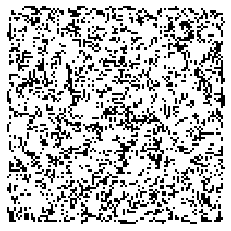

In [10]:
playground2 = update_grid(playground)
plt.axis("off")
plt.imshow(playground2)
plt.show()

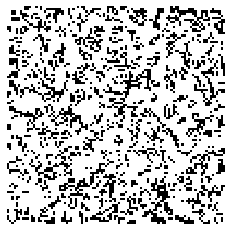

In [11]:
playground3 = update_grid(playground2)
plt.axis("off")
plt.imshow(playground3)
plt.show()

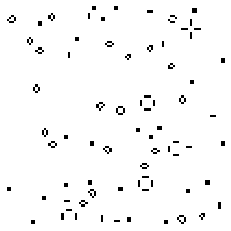

In [48]:
# generating a random set of values lying between 0 and 1
playground = np.random.randint(0,2,[size_x,size_y])

# setting the outer boundary to 0s
playground[:,0]=0
playground[:,size_x-1]=0
playground[0,:]=0
playground[size_y-1,:]=0

playgrounds = [playground] # holds matrices/unrendered images
ims = [] # holds rendered images
fig = plt.figure()
for i in range(2000):
    playgrounds.append(update_grid(playgrounds[i]))
    #plt.figure(figsize=[20,20])
    plt.axis("off")
    #im = plt.imshow(playgrounds[i], animated=True)
    #plt.savefig("playgrounds/img"+str(i)+".png")
    #plt.show()
    im = plt.imshow(playgrounds[i], animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True)

# 10 => 0.01 s
ani.save("Conway's Game.mp4")